In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import calinski_harabasz_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
from itertools import combinations
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.svm import SVR
from statistics import mean
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import seaborn as sns
import xgboost as xgb
import pandas as pd
import arviz as az
import numpy as np
import arviz as az
import pymc as pm
import sqlite3
import joblib
import random 
import math
import os

In [2]:
col_order = ['Player', 'Team', 'Season', 'Age', 'G', 'PA', 'AB',
       'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'XBH', 'SB', 'CS', 'BB', 'SO', 'BA',
       'OBP', 'SLG', 'OPS', 'TB', 'GIDP', 'HBP', 'SH', 'SF', 'IBB',
       'WAR', 'GGs', 'SSs', 'Bat_Titles', 'All_Stars', 'MVPs', 'WS_MVP', 'Pos', 'status']

inactive_data = pd.read_csv('inactive_player_data.csv')
inactive_data = inactive_data[col_order]
active_data = pd.read_csv('new_active_player_data.csv')
active_data = active_data[col_order]

In [3]:
inactive_data

,Player,Team,Season,Age,G,PA,AB,R,H,1B,...,IBB,WAR,GGs,SSs,Bat_Titles,All_Stars,MVPs,WS_MVP,Pos,status
0,Adam Jones,ARI,14,33,137,528,485,66,126,84,...,2.0,-0.7,0,0,0,0,0,0,9,retired
1,Adam Jones,BAL,3,22,132,514,477,61,129,92,...,0.0,2.0,0,0,0,0,0,0,8,retired
2,Adam Jones,BAL,4,23,119,519,473,83,131,87,...,3.0,2.6,1,0,0,1,0,0,8,retired
3,Adam Jones,BAL,5,24,149,621,581,76,165,116,...,1.0,2.5,0,0,0,0,0,0,8,retired
4,Adam Jones,BAL,6,25,151,618,567,68,159,106,...,2.0,3.3,0,0,0,0,0,0,8,retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,Édgar Rentería,STL,5,23,150,643,562,94,156,107,...,3.0,2.2,0,1,0,0,0,0,6,retired
5208,Édgar Rentería,STL,6,24,141,549,493,54,128,96,...,4.0,1.5,0,0,0,0,0,0,6,retired
5209,Édgar Rentería,STL,7,25,152,609,544,77,166,117,...,7.0,4.3,1,1,0,0,0,0,6,retired
5210,Édgar Rentería,STL,8,26,157,663,587,96,194,133,...,12.0,5.6,1,1,0,0,0,0,6,retired


In [4]:
active_data

,Player,Team,Season,Age,G,PA,AB,R,H,1B,...,IBB,WAR,GGs,SSs,Bat_Titles,All_Stars,MVPs,WS_MVP,Pos,status
0,Christian Yelich,MIA,1,21,62,273,240,34,69,52,...,1,1.6,0,0,0,0,0,0,7,active
1,Christian Yelich,MIA,2,22,144,660,582,94,165,120,...,3,3.8,1,0,0,0,0,0,7,active
2,Christian Yelich,MIA,3,23,126,525,476,63,143,104,...,2,3.6,0,0,0,0,0,0,7,active
3,Christian Yelich,MIA,4,24,155,659,578,78,172,110,...,4,4.9,0,1,0,0,0,0,7,active
4,Christian Yelich,MIA,5,25,156,695,602,100,170,114,...,4,3.7,0,0,0,0,0,0,8,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,José Abreu,CHW,5,31,128,553,499,68,132,73,...,7,2.1,0,1,0,1,0,0,3,active
1770,José Abreu,CHW,6,32,159,693,634,85,180,108,...,4,2.3,0,0,0,1,0,0,3,active
1771,José Abreu,CHW,7,33,60,262,240,43,76,42,...,1,2.7,0,1,0,0,1,0,3,active
1772,José Abreu,CHW,8,34,152,659,566,86,148,86,...,3,3.0,0,0,0,0,0,0,3,active


<h2><span style="color:blue; font-weight:bold"><u>Soft Clustering</u></span></h2>

In [5]:
for i in inactive_data.columns[3:37]:
    skew = inactive_data[i].skew()
    print(f'{i} skewness: {skew}')

Age skewness: 0.1810072083496936
G skewness: -1.362974850938581
PA skewness: -1.05763469374795
AB skewness: -1.020124081120541
R skewness: -0.31874233452046746
H skewness: -0.6773855193977166
1B skewness: -0.366240307306468
2B skewness: -0.057788990423966256
3B skewness: 1.6190830724585026
HR skewness: 0.6967106737151384
RBI skewness: -0.006721975829215389
XBH skewness: -0.08014979252737749
SB skewness: 2.4380127925769166
CS skewness: 1.71974008989736
BB skewness: 0.4779402138003494
SO skewness: 0.25578635174060743
BA skewness: -1.1232584805170576
OBP skewness: -1.0023295856945773
SLG skewness: -0.2778134255393927
OPS skewness: -0.5716435244431536
TB skewness: -0.47226362267975885
GIDP skewness: 0.4418857755968422
HBP skewness: 2.5489341313831275
SH skewness: 2.800091029683774
SF skewness: 0.7164057251843686
IBB skewness: 3.324747283986413
WAR skewness: 0.5085146446179789
GGs skewness: 2.236741784388354
SSs skewness: 2.933109058834233
Bat_Titles skewness: 0.0
All_Stars skewness: 1.2665

In [6]:
def fix_skew(df, col):
    skew = df[col].skew()
    abs_skew = abs(skew)
    if abs_skew > 0.5 and abs_skew < 1.0:
        if skew < -0.5:
            max_val = df[col].max()
            df[col] = max_val + 1 - df[col]
        min_val = df[col].min()
        if min_val < 0:
            df[col] = df[col] - min_val
        df[col] = np.sqrt(df[col])

    elif abs_skew >= 1.0:
        if skew <= -1.0:
            max_val = df[col].max()
            df[col] = max_val + 1 - df[col]
        min_val = df[col].min()
        if min_val <= 0:
            df[col] = df[col] + abs(min_val) + 1e-6
        df[col] = np.log(df[col])

def fix_seasons(df):
    for player in df['Player'].unique():
        debut = df.loc[df['Player'] == player, 'Season'].min()
        df.loc[df['Player'] == player, 'Season'] = df.loc[df['Player'] == player, 'Season'] - debut + 1

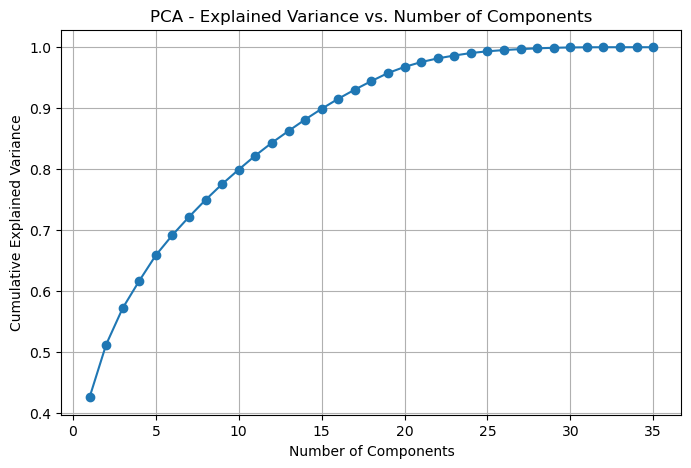

Component 1: 0.4259
Component 2: 0.5124
Component 3: 0.5722
Component 4: 0.6169
Component 5: 0.6589
Component 6: 0.6920
Component 7: 0.7218
Component 8: 0.7497
Component 9: 0.7756
Component 10: 0.7994
Component 11: 0.8223
Component 12: 0.8434
Component 13: 0.8626
Component 14: 0.8814
Component 15: 0.8990
Component 16: 0.9155
Component 17: 0.9305
Component 18: 0.9445
Component 19: 0.9577
Component 20: 0.9677
Component 21: 0.9756
Component 22: 0.9817
Component 23: 0.9864
Component 24: 0.9904
Component 25: 0.9933
Component 26: 0.9954
Component 27: 0.9969
Component 28: 0.9982
Component 29: 0.9991
Component 30: 0.9996
Component 31: 0.9999
Component 32: 1.0000
Component 33: 1.0000
Component 34: 1.0000
Component 35: 1.0000


In [7]:
test_inactive = inactive_data.copy()

test_inactive_X = test_inactive[test_inactive.columns[2:37]].dropna()

for i in test_inactive_X.columns[2:37]:
    fix_skew(test_inactive_X, i)

test_inactive_X_scaled = StandardScaler().fit_transform(test_inactive_X)

test_pca = PCA()
test_pca.fit_transform(test_inactive_X_scaled)

explained_variance = test_pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

for i, var in enumerate(cumulative_variance):
    print(f"Component {i+1}: {var:.4f}")

In [8]:
new_cluster_inactive = inactive_data.copy()

inactive_X = new_cluster_inactive[new_cluster_inactive.columns[2:37]].dropna()

for i in inactive_X.columns[2:37]:
    fix_skew(inactive_X, i)

inactive_X_scaled = StandardScaler().fit_transform(inactive_X)

pca = PCA(n_components=15)
inactive_X_pca = pca.fit_transform(inactive_X_scaled)

calinski_scores = []
cluster_range = range(2, 8)

for k in cluster_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0)
    gmm.fit(inactive_X_pca)
    
    probs = gmm.predict_proba(inactive_X_pca)
    hard_assignments = np.argmax(probs, axis=1)
    
    score = calinski_harabasz_score(inactive_X_pca, hard_assignments)
    calinski_scores.append(score)

best_k = cluster_range[np.argmax(calinski_scores)]
print(f"Best number of clusters by Calinski-Harabasz score: {best_k}")

C:\Users\rcand\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rcand\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\rcand\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rcand\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Best number of clusters by Calinski-Harabasz score: 2


In [9]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
gmm.fit(inactive_X_pca)

probs_inactive = gmm.predict_proba(inactive_X_pca)
hard_assignments_inactive = np.argmax(probs_inactive, axis=1)

new_cluster_inactive['cluster'] = hard_assignments_inactive
new_cluster_inactive['cluster'] = new_cluster_inactive['cluster'] + 1

In [10]:
new_cluster_inactive

,Player,Team,Season,Age,G,PA,AB,R,H,1B,...,WAR,GGs,SSs,Bat_Titles,All_Stars,MVPs,WS_MVP,Pos,status,cluster
0,Adam Jones,ARI,14,33,137,528,485,66,126,84,...,-0.7,0,0,0,0,0,0,9,retired,1
1,Adam Jones,BAL,3,22,132,514,477,61,129,92,...,2.0,0,0,0,0,0,0,8,retired,1
2,Adam Jones,BAL,4,23,119,519,473,83,131,87,...,2.6,1,0,0,1,0,0,8,retired,3
3,Adam Jones,BAL,5,24,149,621,581,76,165,116,...,2.5,0,0,0,0,0,0,8,retired,1
4,Adam Jones,BAL,6,25,151,618,567,68,159,106,...,3.3,0,0,0,0,0,0,8,retired,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,Édgar Rentería,STL,5,23,150,643,562,94,156,107,...,2.2,0,1,0,0,0,0,6,retired,2
5208,Édgar Rentería,STL,6,24,141,549,493,54,128,96,...,1.5,0,0,0,0,0,0,6,retired,1
5209,Édgar Rentería,STL,7,25,152,609,544,77,166,117,...,4.3,1,1,0,0,0,0,6,retired,2
5210,Édgar Rentería,STL,8,26,157,663,587,96,194,133,...,5.6,1,1,0,0,0,0,6,retired,2


In [11]:
new_cluster_active = active_data.copy()

active_X = new_cluster_active[new_cluster_active.columns[2:37]].dropna()

for i in active_X.columns[2:37]:
    fix_skew(active_X, i)

active_X_scaled = StandardScaler().fit_transform(active_X)

active_X_pca = pca.transform(active_X_scaled)

probs_active = gmm.predict_proba(active_X_pca)
hard_assignments_active = np.argmax(probs_active, axis=1)

new_cluster_active['cluster'] = hard_assignments_active
new_cluster_active['cluster'] = new_cluster_active['cluster'] + 1

In [12]:
new_cluster_active

,Player,Team,Season,Age,G,PA,AB,R,H,1B,...,WAR,GGs,SSs,Bat_Titles,All_Stars,MVPs,WS_MVP,Pos,status,cluster
0,Christian Yelich,MIA,1,21,62,273,240,34,69,52,...,1.6,0,0,0,0,0,0,7,active,1
1,Christian Yelich,MIA,2,22,144,660,582,94,165,120,...,3.8,1,0,0,0,0,0,7,active,3
2,Christian Yelich,MIA,3,23,126,525,476,63,143,104,...,3.6,0,0,0,0,0,0,7,active,3
3,Christian Yelich,MIA,4,24,155,659,578,78,172,110,...,4.9,0,1,0,0,0,0,7,active,2
4,Christian Yelich,MIA,5,25,156,695,602,100,170,114,...,3.7,0,0,0,0,0,0,8,active,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,José Abreu,CHW,5,31,128,553,499,68,132,73,...,2.1,0,1,0,1,0,0,3,active,2
1770,José Abreu,CHW,6,32,159,693,634,85,180,108,...,2.3,0,0,0,1,0,0,3,active,3
1771,José Abreu,CHW,7,33,60,262,240,43,76,42,...,2.7,0,1,0,0,1,0,3,active,4
1772,José Abreu,CHW,8,34,152,659,566,86,148,86,...,3.0,0,0,0,0,0,0,3,active,3


In [13]:
print('Inactive Data:')
print(new_cluster_inactive.groupby('cluster')[['PA', 'H', 'HR', 'RBI']].mean())
print('---------------------------------')
print('Active Data')
print(new_cluster_active.groupby('cluster')[['PA', 'H', 'HR', 'RBI']].mean())

Inactive Data:
                 PA           H         HR         RBI
cluster                                               
1        456.020056  109.825706  13.494350   55.243785
2        626.391509  167.419811  26.962264   96.127358
3        598.707572  151.659704  19.217581   76.899913
4        652.131313  180.747475  34.090909  113.040404
---------------------------------
Active Data
                 PA           H         HR         RBI
cluster                                               
1        305.575456   69.239635   9.807629   35.342454
2        599.900000  154.492308  28.653846   87.376923
3        553.729017  131.143885  19.961631   68.793765
4        627.190476  164.904762  38.904762  101.714286


In [14]:
new_cluster_active[new_cluster_active['Player']=='Aaron Judge']

,Player,Team,Season,Age,G,PA,AB,R,H,1B,...,WAR,GGs,SSs,Bat_Titles,All_Stars,MVPs,WS_MVP,Pos,status,cluster
988,Aaron Judge,NYY,1,25,155,678,542,128,154,75,...,8.1,0,1,0,1,0,0,9,active,2
989,Aaron Judge,NYY,2,26,112,498,413,77,115,66,...,6.0,0,0,0,1,0,0,9,active,3
990,Aaron Judge,NYY,3,27,102,447,378,75,103,57,...,5.6,0,0,0,0,0,0,9,active,3
991,Aaron Judge,NYY,4,28,28,114,101,23,26,14,...,1.1,0,0,0,0,0,0,9,active,1
992,Aaron Judge,NYY,5,29,148,633,550,89,158,95,...,5.9,0,1,0,1,0,0,9,active,2
993,Aaron Judge,NYY,6,30,157,696,570,133,177,87,...,10.8,0,1,0,1,1,0,8,active,4
994,Aaron Judge,NYY,7,31,106,458,367,79,98,45,...,4.6,0,0,0,0,0,0,9,active,1
995,Aaron Judge,NYY,8,32,158,704,559,122,180,85,...,10.8,0,1,0,1,1,0,8,active,4


<h2><span style="color:blue; font-weight:bold"><u>Preparing New Datasets for Projection</u></span></h2>

In [1]:
def calc_bat_avg(hits, at_bats):
    if at_bats == 0:
        return 0.0
    return round((hits/at_bats), 3)

def calc_obp(hits, walks, hbp, at_bats, sf):
    first = hits + walks + hbp
    second = at_bats + hbp + sf
    if second == 0:
        return 0.0
    return round((first/second), 3)

def calc_slug(singles, doubles, triples, hrs, at_bats):
    if at_bats == 0:
        return 0.0
    doubles = doubles * 2
    triples = triples * 3
    home_bs = hrs * 4
    return round(((singles+doubles+triples+home_bs)/at_bats), 3)

def calc_ops(obp, slug):
    return round((obp+slug), 3)

def last_3_war(df):
    df_sorted = df.sort_values('Season')
    last_3 = df_sorted.tail(3)
    last_3_war_num = last_3['WAR'].sum()
    return round(last_3_war_num, 1)

def final_df(df):
    col_names = ['Player', 'Age_Start', 'Age_End', 'Avg_PA', 'Seasons_Num', 'G',
    'AB', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'XBH', 'SB', 'CS', 'BB', 'SO',
    'TB', 'GIDP', 'HBP', 'SH', 'SF', 'IBB', 'Total_WAR', 'Avg_WAR', 'Last_3_WAR',
     'BA', 'OBP', 'SLG', 'OPS', 'All_Stars', 'GGs', 'SSs', 'Bat_Titles', 'MVPs',
     'WS_MVP', 'Pos', '1_seasons', '2_seasons', '3_seasons', '4_seasons', 'status']
    
    empty = []
    for player in df['Player'].unique():
        player_df = df[df['Player'] == player]

        hits = player_df['H'].sum()
        at_bats = player_df['AB'].sum()
        walks = player_df['BB'].sum()
        hbp = player_df['HBP'].sum()
        sf = player_df['SF'].sum()
        singles = player_df['1B'].sum()
        doubles = player_df['2B'].sum()
        triples = player_df['3B'].sum()
        hrs = player_df['HR'].sum()

        obp = calc_obp(hits, walks, hbp, at_bats, sf)
        slg = calc_slug(singles, doubles, triples, hrs, at_bats)
        last_3_war_num = last_3_war(player_df)

        temp = [
            player,
            player_df['Age'].min(),
            player_df['Age'].max(),
            round(player_df['PA'].mean()),
            player_df['Season'].nunique(),
            player_df['G'].sum(),
            at_bats,
            player_df['R'].sum(),
            hits,
            singles,
            doubles,
            triples,
            hrs,
            player_df['RBI'].sum(),
            player_df['XBH'].sum(),
            player_df['SB'].sum(),
            player_df['CS'].sum(),
            walks,
            player_df['SO'].sum(),
            player_df['TB'].sum(),
            player_df['GIDP'].sum(),
            hbp,
            player_df['SH'].sum(),
            sf,
            player_df['IBB'].sum(),
            player_df['WAR'].sum(),
            round(player_df['WAR'].mean(),1),
            last_3_war_num,
            calc_bat_avg(hits, at_bats),
            obp,
            slg,
            calc_ops(obp, slg),
            player_df['All_Stars'].sum(),
            player_df['GGs'].sum(),
            player_df['SSs'].sum(),
            player_df['Bat_Titles'].sum(),
            player_df['MVPs'].sum(),
            player_df['WS_MVP'].sum(),
            player_df['Pos'].mode().iloc[0],
            (player_df['cluster'] == 1).sum(),
            (player_df['cluster'] == 2).sum(),
            (player_df['cluster'] == 3).sum(),
            (player_df['cluster'] == 4).sum(),
            player_df['status'].unique()[0]
        ]
        empty.append(temp)
    print('ok')

    new_df = pd.DataFrame(data=empty, columns=col_names)
    return new_df

In [2]:
final_inactive = final_df(new_cluster_inactive)
final_active = final_df(new_cluster_active)

NameError: name 'new_cluster_inactive' is not defined

In [31]:
final_inactive

,Player,Age_Start,Age_End,Avg_PA,Seasons_Num,G,AB,R,H,1B,...,SSs,Bat_Titles,MVPs,WS_MVP,Pos,1_seasons,2_seasons,3_seasons,4_seasons,status
0,Adam Jones,20,33,537,14,1823,7009,963,1939,1292,...,1,0,0,0,8,9,1,4,0,retired
1,Adrian Beltré,19,39,578,21,2933,11068,1524,3166,2015,...,4,0,0,0,5,13,4,4,0,hof
2,Adrián González,22,36,536,15,1929,7139,997,2050,1284,...,2,0,0,0,3,11,2,2,0,retired
3,Al Kaline,19,39,551,21,2804,10088,1613,3000,2029,...,0,0,0,0,9,9,0,12,0,hof
4,Al Oliver,21,37,559,17,2272,8783,1168,2676,1868,...,3,0,0,0,8,10,3,4,0,retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Yadier Molina,21,39,450,19,2224,7817,777,2168,1577,...,1,0,0,0,2,9,1,9,0,retired
318,Yogi Berra,21,38,464,18,2116,7546,1174,2148,1420,...,0,0,3,0,2,15,0,0,3,hof
319,Álex Rodríguez,18,39,570,21,2719,10341,2002,3070,1811,...,0,0,0,0,5,20,0,1,0,retired
320,Álex Ríos,23,33,595,10,1441,5497,781,1558,1017,...,0,0,0,0,9,10,0,0,0,retired


In [32]:
final_active

,Player,Age_Start,Age_End,Avg_PA,Seasons_Num,G,AB,R,H,1B,...,SSs,Bat_Titles,MVPs,WS_MVP,Pos,1_seasons,2_seasons,3_seasons,4_seasons,status
0,Christian Yelich,21,32,532,12,1466,5535,945,1590,1045,...,3,0,1,0,7,4,2,5,1,active
1,Mike Yastrzemski,28,33,430,6,694,2274,365,543,281,...,0,0,0,0,9,6,0,0,0,active
2,Austin Wynns,27,33,97,4,142,361,41,92,70,...,0,0,0,0,2,4,0,0,0,active
3,Jesse Winker,23,30,338,6,558,1742,277,487,302,...,0,0,0,0,7,5,0,1,0,active
4,Taylor Ward,26,30,395,5,487,1738,255,451,288,...,0,0,0,0,9,4,0,1,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Nick Ahmed,25,31,403,7,774,2577,314,610,383,...,0,0,0,0,6,5,0,2,0,active
259,Riley Adams,25,28,141,4,180,500,45,112,65,...,0,0,0,0,2,3,0,1,0,active
260,Willy Adames,22,28,516,7,880,3227,467,800,473,...,0,0,0,0,6,3,0,4,0,active
261,Ronald Acuña Jr.,20,26,465,7,722,2818,581,815,493,...,3,0,1,0,9,3,2,1,1,active


In [33]:
final_inactive.to_csv('final_inactive.csv', index=False)
final_active.to_csv('final_active.csv', index=False)

<h2><span style="color:blue; font-weight:bold"><u>Projection Models</u></span></h2>

In [46]:
test_inactive = final_inactive.copy()
test_inactive['player_idx'] = test_inactive['Player'].astype('category').cat.codes
test_inactive['Pos'] = test_inactive['Pos'].astype('category')
test_inactive['pos_idx'] = test_inactive['Pos'].cat.codes.values

test_active = final_active.copy()
test_active['player_idx'] = test_active['Player'].astype('category').cat.codes
test_active['Pos'] = test_active['Pos'].astype('category')
test_active['pos_idx'] = test_active['Pos'].cat.codes.values

cols_to_scale = ['Age_End', 'Avg_PA', 'Last_3_WAR', 'Seasons_Num', '1_seasons', '2_seasons', '3_seasons', '4_seasons']

new_scaler_pred = StandardScaler()
new_scaler_pred.fit(test_inactive[cols_to_scale])

test_inactive[cols_to_scale] = new_scaler_pred.transform(test_inactive[cols_to_scale])
test_active[cols_to_scale] = new_scaler_pred.transform(test_active[cols_to_scale])

targets = ['AB', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'XBH', 'SB', 'CS', 'BB', 'TB', 'GIDP', 'HBP', 'SH', 'SF',
           'IBB', 'Total_WAR', 'All_Stars', 'GGs', 'SSs', 'Bat_Titles', 'MVPs', 'WS_MVP']

target_scaler = StandardScaler()
target_scaler.fit(test_inactive[targets])

test_inactive[targets] = target_scaler.transform(test_inactive[targets])
test_active[targets] = target_scaler.transform(test_active[targets])

joblib.dump(new_scaler_pred, 'predictor_scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')

['target_scaler.pkl']

In [48]:
models = {}

for target in targets:
    X = final_inactive[cols_to_scale]
    y = final_inactive[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    models[target] = model
    
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"{target}: Train RMSE = {mse**0.5:.2f}")
    print(f"{target}: R^2 Score: {r2:.3f}")

AB: Train RMSE = 733.11
AB: R^2 Score: 0.861
R: Train RMSE = 180.72
R: R^2 Score: 0.751
H: Train RMSE = 260.01
H: R^2 Score: 0.818
1B: Train RMSE = 239.81
1B: R^2 Score: 0.699
2B: Train RMSE = 75.24
2B: R^2 Score: 0.570
3B: Train RMSE = 34.10
3B: R^2 Score: 0.097
HR: Train RMSE = 150.76
HR: R^2 Score: 0.121
RBI: Train RMSE = 307.87
RBI: R^2 Score: 0.441
XBH: Train RMSE = 177.22
XBH: R^2 Score: 0.515
SB: Train RMSE = 168.69
SB: R^2 Score: -0.526
CS: Train RMSE = 46.97
CS: R^2 Score: -0.189
BB: Train RMSE = 246.38
BB: R^2 Score: 0.489
TB: Train RMSE = 564.29
TB: R^2 Score: 0.725
GIDP: Train RMSE = 55.50
GIDP: R^2 Score: 0.399
HBP: Train RMSE = 56.93
HBP: R^2 Score: -0.528
SH: Train RMSE = 43.56
SH: R^2 Score: -0.231
SF: Train RMSE = 22.92
SF: R^2 Score: 0.217
IBB: Train RMSE = 61.72
IBB: R^2 Score: 0.087
Total_WAR: Train RMSE = 15.20
Total_WAR: R^2 Score: 0.653
All_Stars: Train RMSE = 1.99
All_Stars: R^2 Score: 0.688
GGs: Train RMSE = 2.30
GGs: R^2 Score: 0.489
SSs: Train RMSE = 0.36
SSs